In [1]:
import numpy as np
import pandas as pd
import math
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hugo_post_df = pd.read_csv('hugo_posts.csv')
tagged_post_df = pd.read_csv('tagged_posts.csv')

## Get users tagged by @hugonermanracing

In [3]:
hugo_post_df.head()

,alt,caption,childPosts/0/alt,childPosts/0/caption,childPosts/0/commentsCount,childPosts/0/dimensionsHeight,childPosts/0/dimensionsWidth,childPosts/0/displayUrl,childPosts/0/firstComment,childPosts/0/id,...,ownerUsername,position,productType,queryUsername,shortCode,timestamp,type,url,videoUrl,videoViewCount
0,Me sitting behind the wheel of the Audi TCR Ra...,💥💥ANNOUNCEMENT💥💥\nSo excited to announce that ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,hugonerman,1,NaN,hugonerman,CYisbjrPGzp,2022-01-10T08:01:21.000Z,Image,https://www.instagram.com/p/CYisbjrPGzp/,NaN,NaN
1,Photo by Hugo Nerman | Racing Driver on Decemb...,Merry Christmas!🛷🛷\n\n📸@helge360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,hugonerman,2,NaN,hugonerman,CX4kRpDN-dF,2021-12-24T23:21:59.000Z,Image,https://www.instagram.com/p/CX4kRpDN-dF/,NaN,NaN
2,NaN,Time to jump into the car for the season final...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,hugonerman,3,clips,hugonerman,CUvObMAlkaz,2021-10-07T18:45:29.000Z,Video,https://www.instagram.com/p/CUvObMAlkaz/,https://instagram.ftas1-1.fna.fbcdn.net/v/t50....,14862.0
3,NaN,Race Week!🏁 This time we’re heading to the leg...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,hugonerman,4,clips,hugonerman,CTNmC2FF-tE,2021-08-30T20:44:59.000Z,Video,https://www.instagram.com/p/CTNmC2FF-tE/,https://instagram.ftas1-2.fna.fbcdn.net/v/t50....,4217.0
4,Photo shared by Hugo Nerman | Racing Driver on...,What’s a podium without a challenge?🤺\nStarted...,Photo shared by Hugo Nerman | Racing Driver on...,NaN,0.0,1350.0,1080.0,https://instagram.ftas2-2.fna.fbcdn.net/v/t51....,NaN,2.646745e+18,...,hugonerman,5,NaN,hugonerman,CS7IIQEtInw,2021-08-23T16:36:47.000Z,Sidecar,https://www.instagram.com/p/CS7IIQEtInw/,NaN,NaN


In [4]:
all_hugo_tags = hugo_post_df.caption.str.findall(r'@.*?(?=\s|$)').tolist()
# all_hugo_tags

In [5]:
all_hugo_tags = list(filter(None, all_hugo_tags))
hugo_tags_flat_list = []
for sublist in all_hugo_tags:
    for item in sublist:
        hugo_tags_flat_list.append(item)
# hugo_tags_flat_list

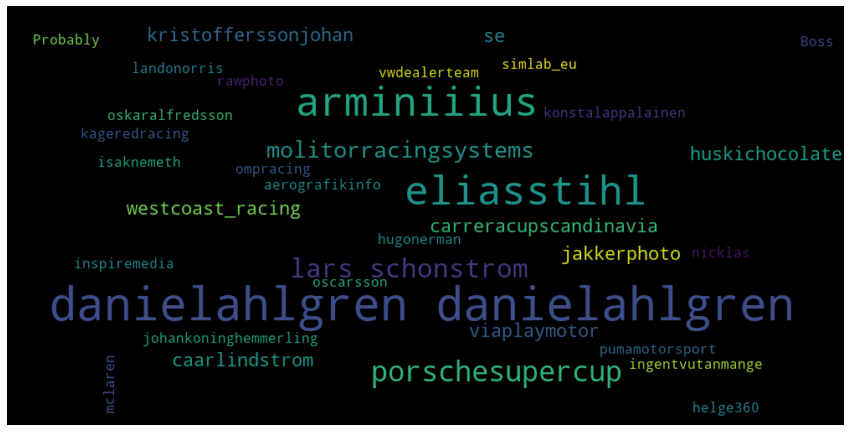

In [6]:
tag_string=(" ").join(hugo_tags_flat_list)
# wordcloud = WordCloud().generate(hashtag_string)
wordcloud_hugo_tags = WordCloud(width = 1000, height = 500).generate(tag_string)
plt.figure(figsize=(15,8))

plt.imshow(wordcloud_hugo_tags, interpolation='bilinear')
plt.axis("off")
plt.show()

In [7]:
count_hugo_tags = Counter(hugo_tags_flat_list)
count_hugo_tags.most_common()

[('@danielahlgren', 21),
 ('@arminiiius', 12),
 ('@eliasstihl', 7),
 ('@porschesupercup', 5),
 ('@eliasstihl⠀', 4),
 ('@lars.schonstrom', 4),
 ('@molitorracingsystems', 3),
 ('@caarlindstrom', 2),
 ('@huskichocolate', 2),
 ('@carreracupscandinavia', 2),
 ('@jakkerphoto', 2),
 ('@viaplaymotor', 2),
 ('@helge360', 1),
 ('@kageredracing', 1),
 ('@simlab_eu', 1),
 ('@westcoast_racing’s', 1),
 ('@mclaren', 1),
 ('@landonorris?', 1),
 ('@johankoninghemmerling', 1),
 ('@hugonerman', 1),
 ('@pumamotorsport⚡️Probably', 1),
 ('@eliasstihl,', 1),
 ('@rawphoto.se', 1),
 ('@konstalappalainen🤙', 1),
 ('@ingentvutanmange', 1),
 ('@Boss', 1),
 ('@westcoast_racing', 1),
 ('@vwdealerteam', 1),
 ('@kristofferssonjohan🌪@nicklas.oscarsson🌪', 1),
 ('@ompracing👊', 1),
 ('@aerografikinfo', 1),
 ('@kristofferssonjohan', 1),
 ('@inspiremedia.se', 1),
 ('@isaknemeth', 1),
 ('@oskaralfredsson', 1)]

## Get users who are tagging @hugonermanracing

In [8]:
tagged_post_df.head()

,postUrl,profileUrl,username,likeCount,commentCount,caption,pubDate,description,location,locationId,...,taggedFullName28,taggedUsername28,taggedFullName29,taggedUsername29,taggedFullName30,taggedUsername30,taggedFullName31,taggedUsername31,taggedFullName32,taggedUsername32
0,https://www.instagram.com/p/CU0MyWeIGVT/,https://www.instagram.com/brinkmotorsport,brinkmotorsport,130,5,NaN,2021-10-09T17:05:36.000Z,Race 3 ✅\n\nDunderkörning av @tobiasbrink sta...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/p/CUz1pbEoCuI/,https://www.instagram.com/brinkmotorsport,brinkmotorsport,103,0,NaN,2021-10-09T13:43:24.000Z,Race 2 ✅\n\nTufft i starten för @tobiasbrink ...,Ring Knutstorp,1.281506e+14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/p/CUo2ShQNLGy/,https://www.instagram.com/stcc_official,stcc_official,70,0,NaN,2021-10-05T07:17:22.000Z,Från en race weekend till nästa! 🏁 Ladda upp...,Mantorp Park,2.368596e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/p/CUjgaYIsRkl/,https://www.instagram.com/motorsportmagasinet,motorsportmagasinet,42,0,NaN,2021-10-03T05:30:00.000Z,I helgen är vi på plats på @mantorppark fö...,Mantorp Park,2.368596e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/p/CUKM7uBMnyf/,https://www.instagram.com/motorsportmagasinet,motorsportmagasinet,78,2,NaN,2021-09-23T09:38:46.000Z,Vallåkra 2021 💥 \n\n#vallåkraträffen #valla...,Vallåkra TRÄFFEN,1.021666e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
users_tagging_hugo = tagged_post_df[['username','description']]
# users_tagging_hugo
tags_mentioning_hugo = users_tagging_hugo[users_tagging_hugo['description'].str.contains("@hugonerman", na=False)]
tags_mentioning_hugo.dropna(inplace=True)
tags_mentioning_hugo

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,username,description
5,genetorcowork,Taggade inför morgondagens nätverksfrukost h...
6,carspot_helsingborg,"Nexusball Rally 2021 over for this time, with ..."
12,jdm_king_22,What will happen taking screenshot!!😅\n🔰Follow...
14,porscheclubsverige,Sköna bilder från #trackday med @hugonerman ...
20,_porschefans_,#repost from @hugonerman on tiktok 🤩\n-\n-\nIf...
23,annikaperger,Nätverksfrukost digitalt💻 med @hugonerman - g...
25,fnerman,Så här glad är man efter nästan 300 varv i...
32,carspot_helsingborg,Now it is time to get started with daily pics ...
33,porschespotter.se,Now it is time to get started with daily pics ...
37,tcr_global_news,STCC TCR SCANDINAVIA:\nYoung driver @hugonerma...


In [10]:
hugo_influencers = tags_mentioning_hugo['username']
hugo_influencers = hugo_influencers.tolist()

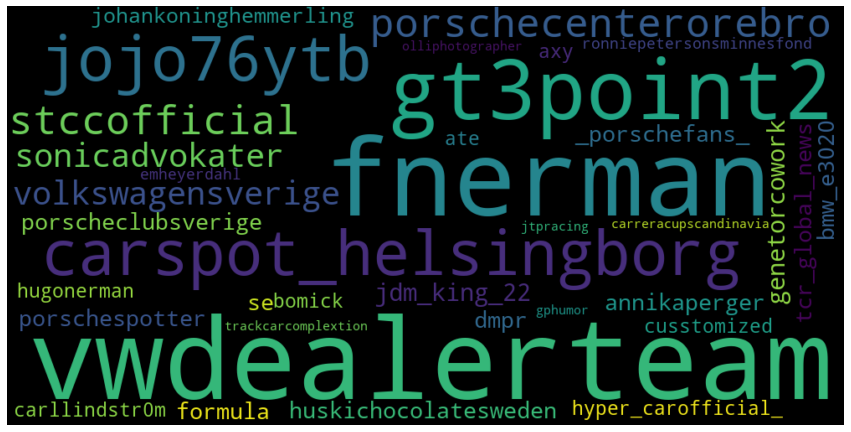

In [11]:
influencer_string=(" ").join(hugo_influencers)
# wordcloud = WordCloud().generate(hashtag_string)
wordcloud_influencer = WordCloud(width = 1000, height = 500).generate(influencer_string)
plt.figure(figsize=(15,8))

plt.imshow(wordcloud_influencer, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
count_tags = Counter(hugo_influencers)
count_tags.most_common()

[('vwdealerteam', 8),
 ('fnerman', 7),
 ('gt3point2', 4),
 ('carspot_helsingborg', 2),
 ('jojo76ytb', 2),
 ('porschecenterorebro', 2),
 ('stccofficial', 2),
 ('volkswagensverige', 2),
 ('sonicadvokater', 2),
 ('genetorcowork', 1),
 ('jdm_king_22', 1),
 ('porscheclubsverige', 1),
 ('_porschefans_', 1),
 ('annikaperger', 1),
 ('porschespotter.se', 1),
 ('tcr_global_news', 1),
 ('formula.dmpr', 1),
 ('bmw_e3020', 1),
 ('huskichocolatesweden', 1),
 ('johankoninghemmerling', 1),
 ('hyper_carofficial_', 1),
 ('carllindstr0m', 1),
 ('hugonerman', 1),
 ('axy.bomick', 1),
 ('cusstomized', 1),
 ('9.ate.7', 1),
 ('ronniepetersonsminnesfond', 1),
 ('emheyerdahl', 1),
 ('carreracupscandinavia', 1),
 ('jtpracing', 1),
 ('gphumor', 1),
 ('trackcarcomplextion', 1),
 ('olliphotographer', 1)]